# Lineare Regression

## Lernziele

```{admonition} Lernziele
:class: important
* Sie kennen das **lineare Regressionsmodell**.
* Sie können erste grundlegende Schritte der Datenvorverarbeitung anwenden:
    * Sie können unvollständige Daten mit **dropna** aus dem Datensatz
      entfernen. 
    * Sie können Ausreißer mit **drop** entfernen.
    * Sie können eine Eigenschaft als Input auswählen und mit **reshape** in
      Matrixform bringen.
* Sie können ein lineares Regressionsmodell aus Scikit-Learn laden und mit
  **fit** trainieren.
* Sie können mit dem trainierten Modell und **predict** eine Prognose abgeben.
```

## Regression kommt aus der Statistik

In der Statistik beschäftigen sich Mathematikerinnen und Mathematiker bereits
seit Jahrhunderten damit, Analyseverfahren zu entwickeln, mit denen
experimentelle Daten gut erklärt werden können. Falls wir eine “erklärende”
Variable haben und wir versuchen, die Abhängigkeit einer Messgröße von der
erklärenden Variable zu beschreiben, nennen wir das Regressionsanalyse oder kurz
**Regression**. Bei vielen Problemen suchen wir nach einem linearen Zusammenhang
und sprechen daher von **linearer Regression**. Mehr Details finden Sie auch bei
[Wikipedia → Regressionsanalyse](https://de.wikipedia.org/wiki/Regressionsanalyse).

Etwas präziser formuliert ist lineare Regression ein Verfahren, bei dem es eine
Einflussgröße $x$ und eine Zielgröße $y$ mit $M$ Paaren von dazugehörigen
Messwerten $(x^{(1)},y^{(1)})$, $(x^{(2)},y^{(2)})$, $\ldots$,
$(x^{(M)},y^{(M)})$ gibt. Dann sollen zwei Koeffizienten $\omega_0$ und
$\omega_1$ geschätzt werden, so dass möglichst für alle Datenpunkte $(x^{(i)},
y^{(i)})$ die lineare Gleichung $y^{(i)} = \omega_0 + \omega_1 x^{(i)}$ gilt.
Geometrisch ausgedrückt: durch die Daten soll eine Gerade gelegt werden. Da bei
den Messungen auch Messfehler auftreten, werden wir die Gerade nicht perfekt
treffen, sondern kleine Fehler machen, die wir hier mit $\varepsilon^{(i)}$
bezeichnen. Wir suchen also die beiden Parameter $\omega_0$ und $\omega_1$, so
dass  

$$y^{(i)} = \omega_0 + \omega_1 x^{(i)} + \varepsilon^{(i)}.$$

Die folgende Grafik veranschaulicht das lineare Regressionsmodell. Die Paare von
Daten sind in blau gezeichnet, das lineare Regressionsmodell in rot.

```{figure} pics/Linear_regression.svg
---
name: fig_linear_regression
---
Lineare Regression: die erklärende Variable (= Input oder unabhängige Variable oder Ursache) ist auf der x-Achse, die
abhängige Variable (= Output oder Wirkung) ist auf der y-Achse aufgetragen, Paare von Messungen sind in blau
gekennzeichnet, das Modell in rot.

([Quelle:](https://en.wikipedia.org/wiki/Linear_regression#/media/File:Linear_regression.svg) "Example of simple linear regression, which has one independent variable" von Sewaqu. Lizenz: Public domain))
```

Zu einer Regressionsanalyse gehört mehr als nur die Regressionskoeffizienten zu
bestimmen. Daten müssen vorverarbeitet werden, unter mehreren unabhängigen
Variablen (Inputs) müssen diejenigen ausgewählt werden, die tatsächlich die
Wirkung erklären. Das lineare Regressionsmodell muss trainiert werden und es
muss getestet werden. Bei den meisten ML-Modellen gibt es noch Modellparameter,
die feinjustiert werden können und die Prognosefähigkeit verbessern.

Im Folgenden erkunden wir einen realistischen Datensatz und bereiten die Daten
für das Training eines linearen Regressionsmodells mit Scikit-Learn vor.

## Deutscher Gebrauchtwagenmarkt (Autoscout24)

Um realistische Beispiele zu haben, mit denen wir die lineare Regression
erkunden können, laden wir einen Datensatz mit Daten über den deutschen
Gebrauchtwagenmarkt von 2011 bis 2021 (Autoscout24). Der Datensatz stammt von
[Kaggle](https://www.kaggle.com/datasets/ander289386/cars-germany). Enthalten
sind Daten zu

* mileage: kilometres traveled by the vehicle (= Kilometerstand)
* make: make of the car (= Marke)
* model: model of the car (= Modell)
* fuel: fuel type (= Treibstoffart)
* gear: manual or automatic (= Getriebe)
* offerType: type of offer (new, used, ...) (= Angebotsart)
* price: sale price of the vehicle (= Gebrauchtpreis)
* hp: horse power (= PS)
* year: the vehicle registration year (= Baujahr)

Wie immer laden wir die Daten und verschaffen uns zunächst einen Überblick.

In [2]:
import pandas as pd

data_raw = pd.read_csv('data/autoscout24-germany-dataset.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


Offensichtlich sind in den Spalten 'model', 'gear' und 'hp' einige Datensätze
nicht vollständig. Das erkennen wir daran, dass insgesmt 46.405 Einträge
vorliegen, aber in diesen drei Spalten weniger erfasst sind. 

Wir machen es uns jetzt einfach und entfernen die nicht vollständigen Daten aus
unserem Datensatz mit der Methode `.dropna()`, siehe [Scikit-Learn
(Dokumentation
dropna)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).
Bei einem echten Industrieprojekt müssten wir dem Problem nachgehen und die
fehlenden Daten beschaffen. Sollte das nicht gehen, so müssten wir als nächstes
analysieren, warum die Daten fehlen, ob beispielsweise eine Systematik
dahintersteckt, und uns dann einen geeigneten Plan machen, wie mit den fehlenden
Daten umzugehen ist. Das ist ein eigenständiges Thema innerhalb des ML, auf das
wir im nächsten Kapitel noch näher eingehen werden.

In [3]:
data = data_raw.dropna().copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46071 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46071 non-null  int64  
 1   make       46071 non-null  object 
 2   model      46071 non-null  object 
 3   fuel       46071 non-null  object 
 4   gear       46071 non-null  object 
 5   offerType  46071 non-null  object 
 6   price      46071 non-null  int64  
 7   hp         46071 non-null  float64
 8   year       46071 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.5+ MB


In dem Datensatz gibt es nur vier Eigenschaften, die numerisch sind, also in
Form von Zahlen repräsentiert werden. Wir wählen die Eigenschaft Preis als
Zielgröße (=abhängige Variable oder Wirkung oder Output).

Als nächstes erkunden wir, wie der Preis abhängig von den Inputs

* Kilometerstand,
* Baujahr und
* PS

ist, indem wir die Daten plotten. Wir fangen mit dem Kilometerstand der Autos an.

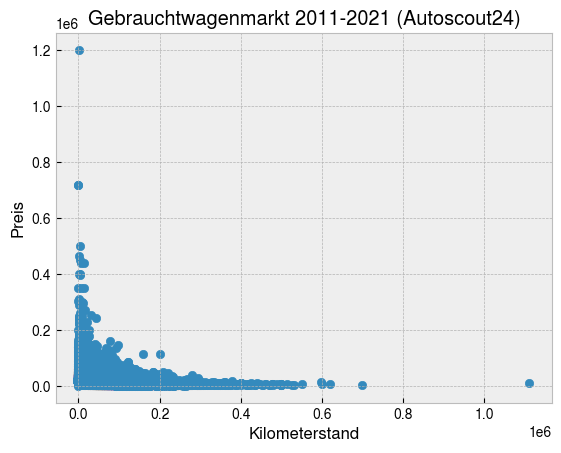

In [4]:
# extract data
x_km = data.loc[:, 'mileage'].values
y = data.loc[:, 'price'].values

# plot
import matplotlib.pylab as plt
plt.style.use('bmh')

fig, ax = plt.subplots()
ax.scatter(x_km, y)
ax.set_xlabel('Kilometerstand')
ax.set_ylabel('Preis')
ax.set_title('Gebrauchtwagenmarkt 2011-2021 (Autoscout24)');


Zunächst einmal stören die Ausreißer etwas. Wir suchen zuerst mal nach
den Einträgen mit Preisen über eine halbe Mio. Euro. 

In [19]:
filter = data.loc[:, 'price'] > 500000
data.loc[filter, :].head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
11753,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630.0,2019
11754,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630.0,2019
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017


Wahrscheinlich handelt es sich bei Eintrag 11753 und 11754 ohnehin um das
gleiche Fahrzeug. Wir entfernen die drei Einträge mit der `drop()`-Methode,
siehe [Pandas Dokumentation
(drop)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).

In [5]:
data = data.drop([11753, 11754, 21675])

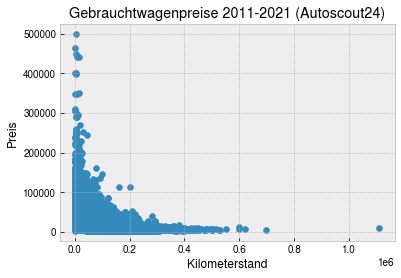

In [28]:
# data
x_km = data.loc[:, 'mileage'].values
y = data.loc[:, 'price'].values

# plot
fig, ax = plt.subplots()
ax.scatter(x_km, y)
ax.set_xlabel('Kilometerstand')
ax.set_ylabel('Preis')
ax.set_title('Gebrauchtwagenmarkt2011-2021 (Autoscout24)');

Sieht nicht besonders linear aus, eher wie eine Hyperbel. Als nächstes
betrachten wir den Preis in Abhängigkeit des Baujahrs. 

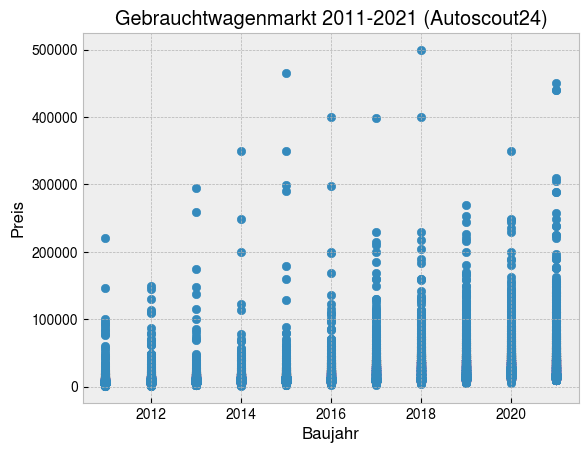

In [6]:
# data
x_bj = data.loc[:, 'year'].values
y = data.loc[:, 'price'].values

# plot
fig, ax = plt.subplots()
ax.scatter(x_bj, y)
ax.set_xlabel('Baujahr')
ax.set_ylabel('Preis')
ax.set_title('Gebrauchtwagenmarkt 2011-2021 (Autoscout24)');

Je jünger, desto teurer, könnte linear sein. Und zuletzt visualisieren wir den
Preis abhängig von der PS-Zahl.

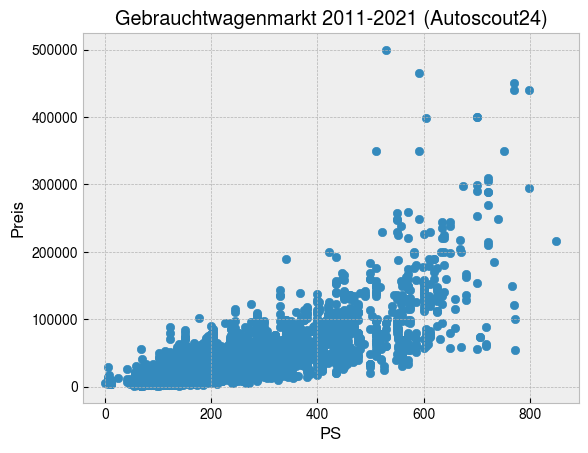

In [7]:
# data
x_ps = data.loc[:, 'hp'].values
y = data.loc[:, 'price'].values

# plot
fig, ax = plt.subplots()
ax.scatter(x_ps, y)
ax.set_xlabel('PS')
ax.set_ylabel('Preis')
ax.set_title('Gebrauchtwagenmarkt 2011-2021 (Autoscout24)');

Bei dem Input PS scheint es eine lineare Abhängigkeit zu geben. Je mehr PS desto
teurer. 

## Scikit-Learn: LinearRegression

Die Bestimmung der Koeffizienten $\omega_0$ und $\omega_1$ der Geraden $y^{(i)}
= \omega_0 + \omega x^{(i)}$ funktioniert nicht mehr händisch. Natürlich wäre es
möglich, solange Steigungen $\omega_1$ und y-Achsenabschnitte $\omega_0$ zu
raten, bis eine Gerade herauskommt, die annähernd passt. Scikit-Learn liefert
uns sogar die beste Gerade, wobei wir noch diskutieren müssen, was "die beste"
genau heißt.  

Um Scikit-Learn arbeiten zu lassen, importieren wir die linearen
Regressionsmodelle `LinearRegression` aus dem Modul `sklearn.linear_model`.
Danach initialiseren wir das Modell und speichern es in der Variable `model`.

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Mit der Methode `.fit()` werden die Koeffizienten des Modells an die Daten
angepasst. Dazu müssen die Daten in einem bestimmten Format vorliegen. Bei den
Inputs wird davon ausgegangen, dass mehrere Eigenschaften in das Modell eingehen
sollen. Die Eigenschaften stehen normalerweise in den Spalten des Datensatzes.
Beim Output erwarten wir zunächst nur eine Eigenschaft, die durch das Modell
erklärt werden soll. Daher geht Scikit-Learn davon aus, dass der Input eine
Matrix $X$ ist, die M Zeilen und N Spalten hat. M ist die Anzahl an Daten, hier
also die Anzahl der Autos, und N ist die Anzahl der Eigenschaften, die
betrachtet werden sollen. Da wir momentan nur die Abhängigkeit des Preises von
der PS-Zahl analysieren wollen, ist $N=1$. Beim Output geht Scikit-Learn davon
aus, dass ein eindimensionaler Spaltenvektor vorliegt, der natürlich ebenfalls M
Zeilen hat. Wir müssen daher unsere PS-Zahlen noch in das Matrix-Format bringen.
Dazu verwenden wir aus dem Numpy-Modul die `.reshape()` Methode, siehe
[Numpy-Dokumentation →
reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [9]:
# Konvertiere in Matrix-Format
X = x_ps.reshape(-1, 1)

#  Training des linearen Regressionsmodells
model.fit(X, y);

Nachdem das lineare Regressionsmodell trainiert wurde, können wir die Steigung
in dem Attribut `.coef_`ablesen und den y-Achsenabschnitt in dem Attribut
`.intercept_`.

In [10]:
print('Steigung: ')
print(model.coef_)

print('y-Achsenabschnitt: ')
print(model.intercept_)

Steigung: 
[186.80491242]
y-Achsenabschnitt: 
-8330.026523876397


Damit könnten wir eine Geradengleichung aufstellen und eine Funktion
implementieren, um für eine PS-Zahl eine Prognose abzugeben, welchen
Verkauspreis das Auto erzielen könnte. Aber tatsächlich hat das Scikit-Learn für
uns schon erledigt. Die Methode `.predict()` berechnet mit den intern
gespeicherten Koeffizienten des linearen Regressionsmodells eine Prognose. Für
eine PS-Zahl von 80 Ps wird ein Verkaufspreis von 

In [11]:
model.predict([[80]])

array([6614.36646954])

6.614 EUR erzielt. Denken Sie daran, dass eine Matrix als Input übergeben werden
muss.

Damit können wir auch eine Wertetabelle für PS-Zahlen von 0 bis 800 PS
aufstellen und das Ergebnis zusammen mit den tatsächlichen Verkaufspreisen
visualisieren.

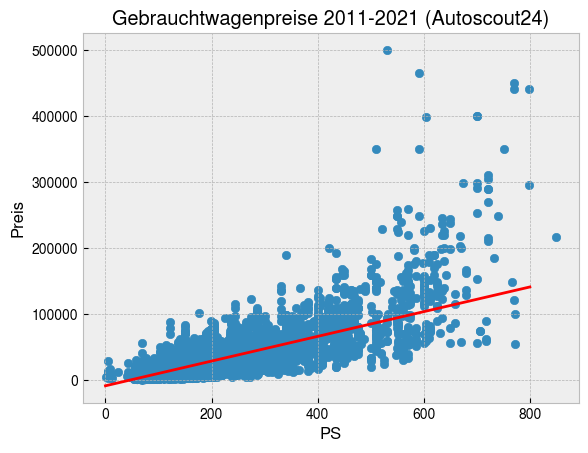

In [12]:
import numpy as np

X_predict = np.linspace(0, 800).reshape(-1,1)
y_predict = model.predict(X_predict)

# plot
fig, ax = plt.subplots()
ax.scatter(x_ps, y)
ax.plot(X_predict, y_predict, color='red')
ax.set_xlabel('PS')
ax.set_ylabel('Preis')
ax.set_title('Gebrauchtwagenpreise 2011-2021 (Autoscout24)');

## Zusammenfassung

In diesem Abschnitt haben Sie das theoretische Modell der linearen Regression
kennengelernt. Um mit einem realistischen Datensatz zu arbeiten, haben wir einen
Datensatz von Kaggle importiert und die Daten vorverarbeitet. Danach haben wir
mit Scikit-Learn ein lineare Regressionsmodell trainiert und damit eine Prognose
erstellt.
